In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from google.colab import drive
drive.mount("/content/drive")


Mounted at /content/drive


In [4]:
cols="""duration,
protocol_type,
service,
flag,
src_bytes,
dst_bytes,
land,
wrong_fragment,
urgent,
hot,
num_failed_logins,
logged_in,
num_compromised,
root_shell,
su_attempted,
num_root,
num_file_creations,
num_shells,
num_access_files,
num_outbound_cmds,
is_host_login,
is_guest_login,
count,
srv_count,
serror_rate,
srv_serror_rate,
rerror_rate,
srv_rerror_rate,
same_srv_rate,
diff_srv_rate,
srv_diff_host_rate,
dst_host_count,
dst_host_srv_count,
dst_host_same_srv_rate,
dst_host_diff_srv_rate,
dst_host_same_src_port_rate,
dst_host_srv_diff_host_rate,
dst_host_serror_rate,
dst_host_srv_serror_rate,
dst_host_rerror_rate,
dst_host_srv_rerror_rate"""

columns=[]
for c in cols.split(','):
    if(c.strip()):
       columns.append(c.strip())

columns.append('target')
print(columns)
print(len(columns))

['duration', 'protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell', 'su_attempted', 'num_root', 'num_file_creations', 'num_shells', 'num_access_files', 'num_outbound_cmds', 'is_host_login', 'is_guest_login', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'target']
42


In [ ]:
attacks_types = {
    'normal': 'normal',
'back': 'dos',
'buffer_overflow': 'u2r',
'ftp_write': 'r2l',
'guess_passwd': 'r2l',
'imap': 'r2l',
'ipsweep': 'probe',
'land': 'dos',
'loadmodule': 'u2r',
'multihop': 'r2l',
'neptune': 'dos',
'nmap': 'probe',
'perl': 'u2r',
'phf': 'r2l',
'pod': 'dos',
'portsweep': 'probe',
'rootkit': 'u2r',
'satan': 'probe',
'smurf': 'dos',
'spy': 'r2l',
'teardrop': 'dos',
'warezclient': 'r2l',
'warezmaster': 'r2l',
}
print(len(attacks_types))

In [ ]:
path = "/content/drive/MyDrive/KDD_CUP/kddcup.data_10_percent.gz"
df = pd.read_csv(path,names=columns)

#Adding Attack Type column
df['Attack Type'] = df.target.apply(lambda r:attacks_types[r[:-1]])

df.head()

In [ ]:
df["Attack Type"].value_counts()

dos       391458
normal     97278
probe       4107
r2l         1126
u2r           52
Name: Attack Type, dtype: int64

In [ ]:
#Visualization
def bar_g(feature):
  df[feature].value_counts().plot(kind="bar")

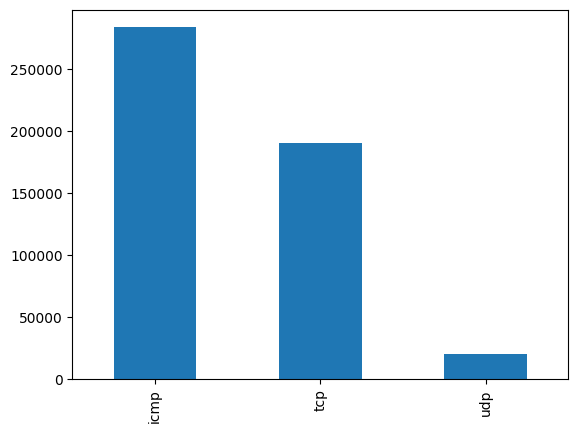

In [ ]:
bar_g("protocol_type")

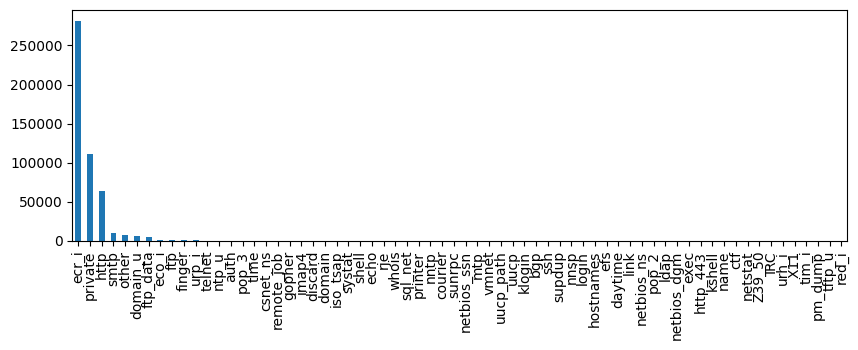

In [ ]:
plt.figure(figsize=(10,3))
bar_g("service")

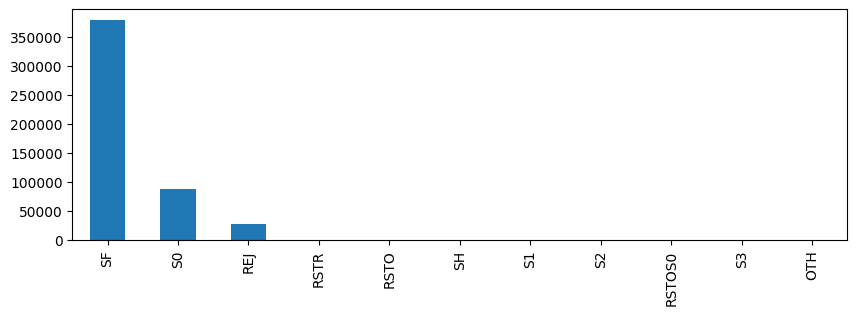

In [ ]:
plt.figure(figsize=(10,3))
bar_g("flag")

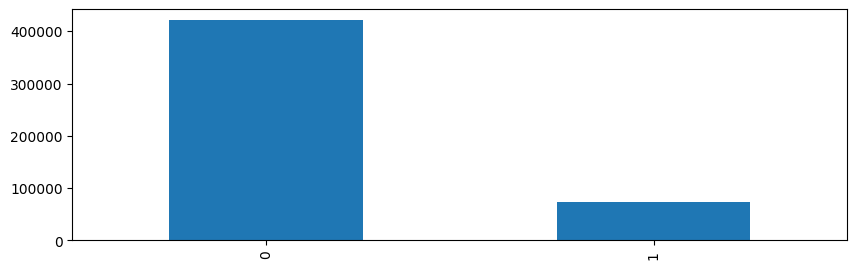

In [ ]:
plt.figure(figsize=(10,3))
bar_g("logged_in")

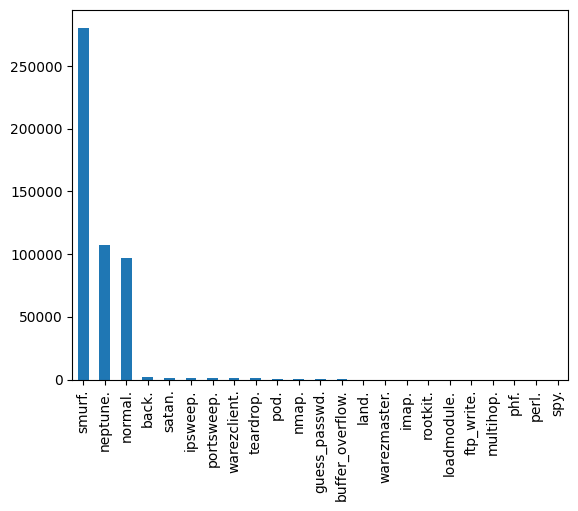

In [ ]:
bar_g("target")

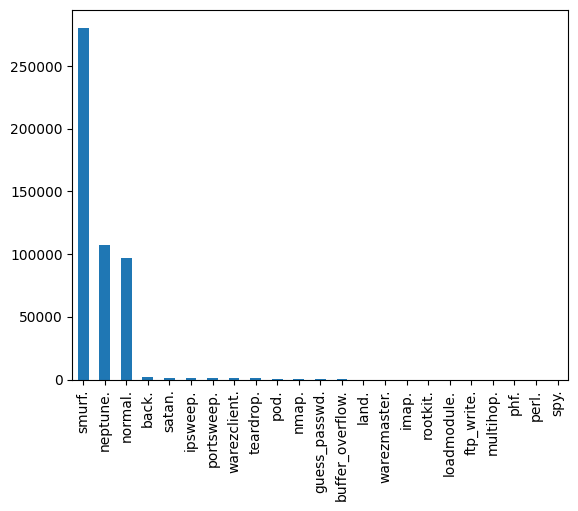

In [ ]:
bar_g("target")

In [ ]:
df.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'target', 'Attack Type'],
      dtype='object')

<ipython-input-16-b265b09d20a5>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.
  df = df.dropna("columns")
<ipython-input-16-b265b09d20a5>:10: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, fmt=".2f")


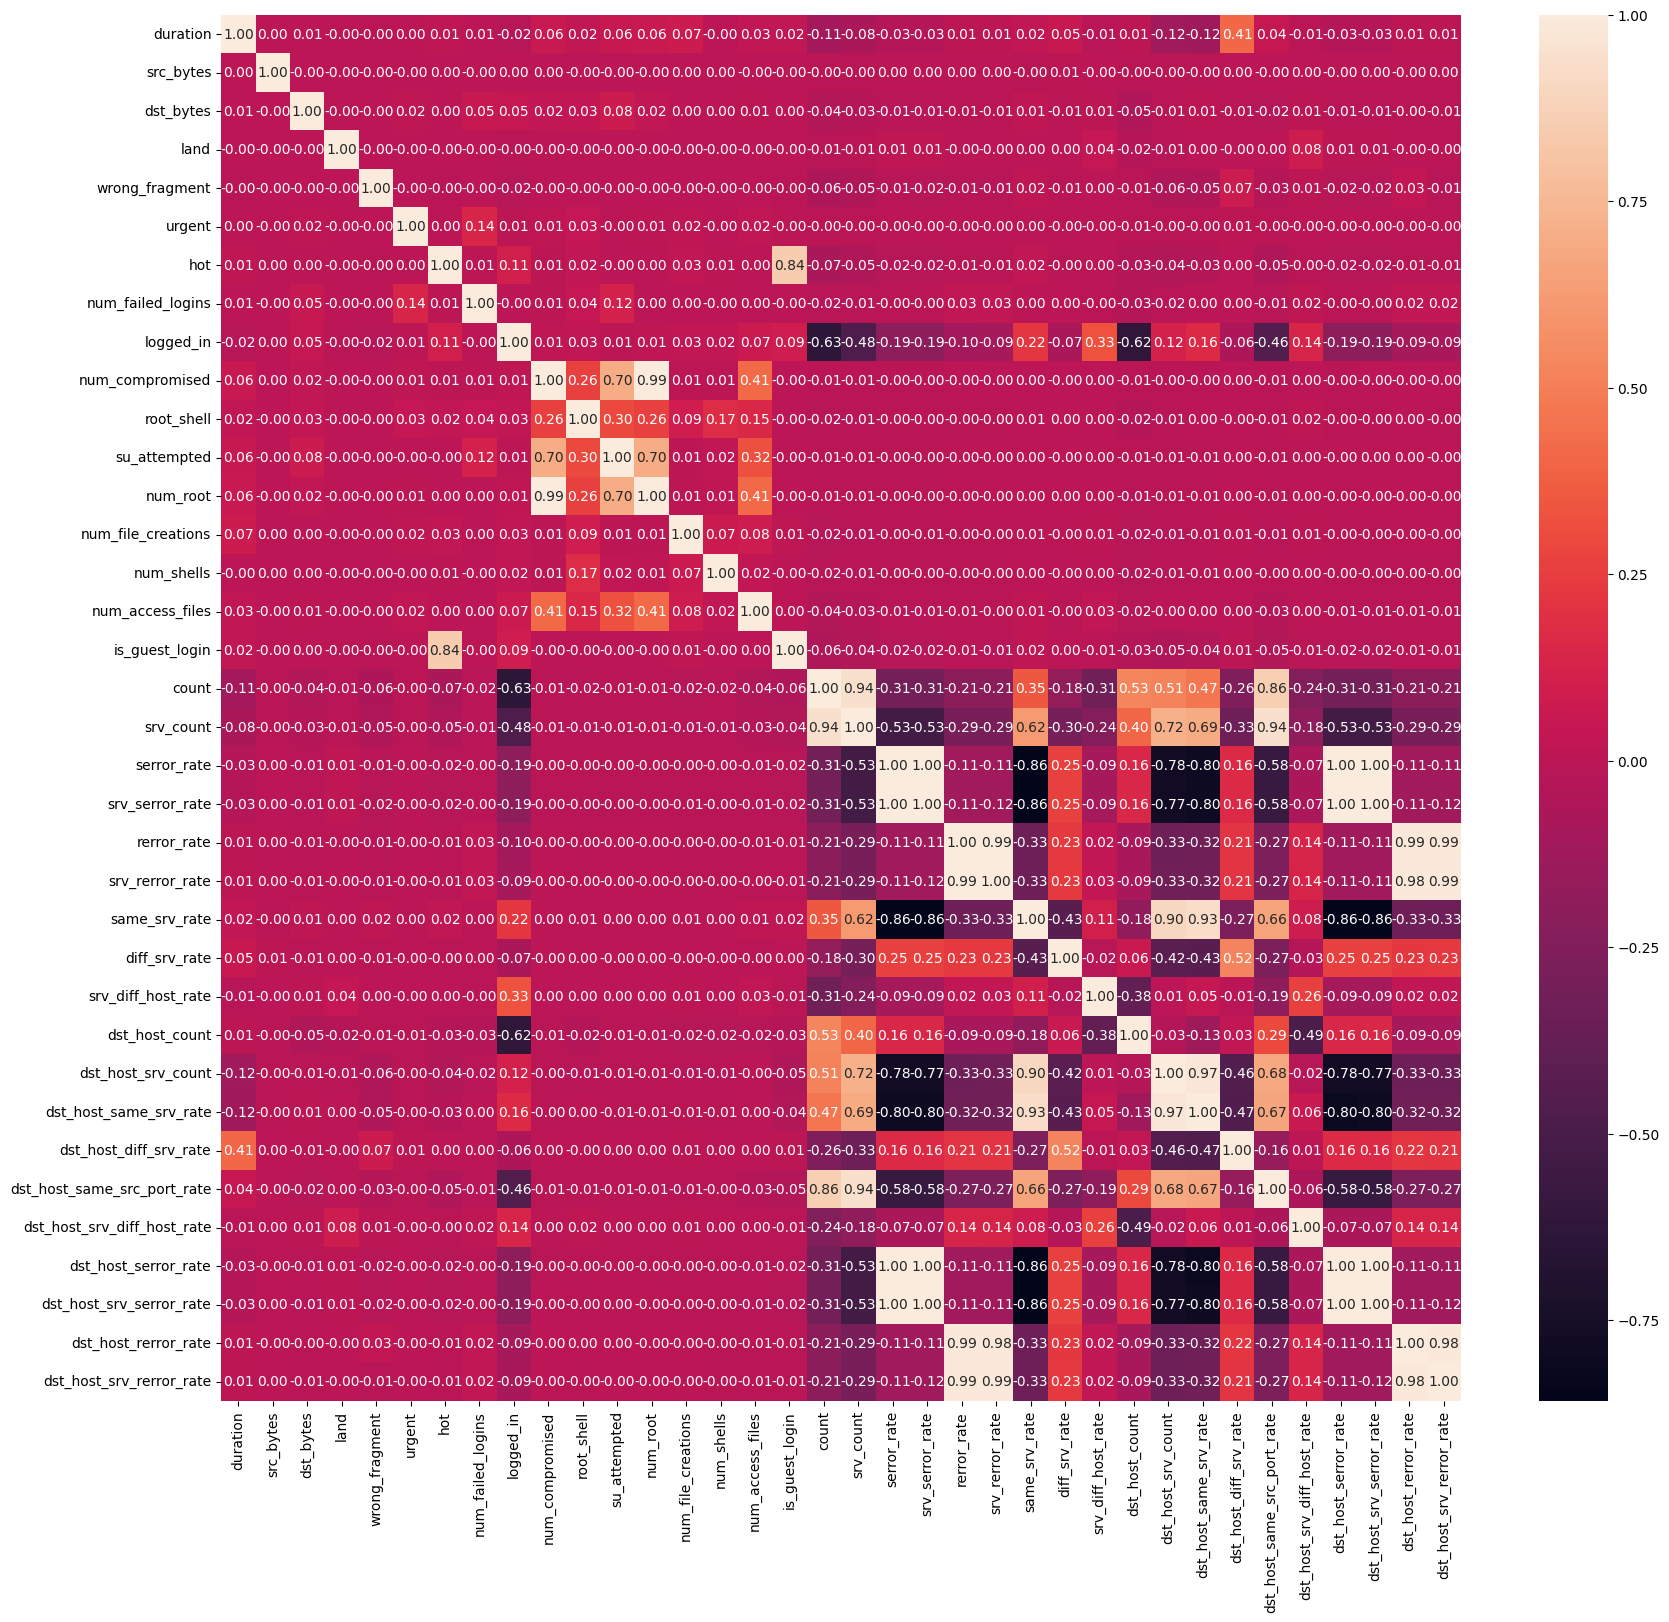

In [ ]:
#drop columns with NaN
df = df.dropna("columns")

#Kepp columns where there are more than 1 unique values
df = df[[col for col in df if df[col].nunique() > 1 ]]

corr = df.corr

plt.figure(figsize=(20,18))
sns.heatmap(df.corr(), annot=True, fmt=".2f")
plt.show()

In [ ]:
#This variable is highly correlated with num_compromised and should be ignored for analysis.
#(Correlation = 0.9938277978738366)
df.drop("num_root",axis = 1, inplace = True)

#This variable is highly correlated with serror_rate and should be ignored for analysis.
#(Correlation = 0.9983615072725952
df.drop("srv_serror_rate", axis = 1, inplace = True)

#This variable is highly correlated with rerror_rate and should be ignored for analysis.
#(Correlation = 0.9947309539817937)
df.drop('srv_rerror_rate',axis = 1, inplace=True)

#This variable is highly correlated with srv_serror_rate and should be ignored for analysis.
#(Correlation = 0.9993041091850098)
df.drop('dst_host_srv_serror_rate',axis = 1, inplace=True)

#This variable is highly correlated with rerror_rate and should be ignored for analysis.
#(Correlation = 0.9869947924956001)
df.drop('dst_host_serror_rate',axis = 1, inplace=True)

#This variable is highly correlated with srv_rerror_rate and should be ignored for analysis.
#(Correlation = 0.9821663427308375)
df.drop('dst_host_rerror_rate',axis = 1, inplace=True)

#This variable is highly correlated with rerror_rate and should be ignored for analysis.
#(Correlation = 0.9851995540751249)
df.drop('dst_host_srv_rerror_rate',axis = 1, inplace=True)

#This variable is highly correlated with dst_host_srv_count and should be ignored for analysis.
#(Correlation = 0.9736854572953938)
df.drop('dst_host_same_srv_rate',axis = 1, inplace=True)

In [ ]:
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,target,Attack Type
0,0,tcp,http,SF,181,5450,0,0,0,0,...,1.0,0.0,0.0,9,9,0.0,0.11,0.0,normal.,normal
1,0,tcp,http,SF,239,486,0,0,0,0,...,1.0,0.0,0.0,19,19,0.0,0.05,0.0,normal.,normal
2,0,tcp,http,SF,235,1337,0,0,0,0,...,1.0,0.0,0.0,29,29,0.0,0.03,0.0,normal.,normal
3,0,tcp,http,SF,219,1337,0,0,0,0,...,1.0,0.0,0.0,39,39,0.0,0.03,0.0,normal.,normal
4,0,tcp,http,SF,217,2032,0,0,0,0,...,1.0,0.0,0.0,49,49,0.0,0.02,0.0,normal.,normal


In [ ]:
#protocol_type the features
pmap = {"icmp":0, "tcp":1, "udp": 2}

df["protocol_type"] = df["protocol_type"].map(pmap)

In [ ]:
df["protocol_type"]


0         1
1         1
2         1
3         1
4         1
         ..
494016    1
494017    1
494018    1
494019    1
494020    1
Name: protocol_type, Length: 494021, dtype: int64

In [ ]:
#flag feature mapping
fmap = {'SF':0,'S0':1,'REJ':2,'RSTR':3,'RSTO':4,'SH':5 ,'S1':6 ,'S2':7,'RSTOS0':8,'S3':9 ,'OTH':10}
df['flag'] = df['flag'].map(fmap)

In [ ]:
df["flag"]


0         0
1         0
2         0
3         0
4         0
         ..
494016    0
494017    0
494018    0
494019    0
494020    0
Name: flag, Length: 494021, dtype: int64

In [ ]:
#attack type feature mapping
amap = {"dos":0, "normal":1, "probe":2, "r2l":3, "u2r": 4}
df["Attack Type"] = df["Attack Type"].map(amap)

In [ ]:
df["Attack Type"]

0         1
1         1
2         1
3         1
4         1
         ..
494016    1
494017    1
494018    1
494019    1
494020    1
Name: Attack Type, Length: 494021, dtype: int64

In [ ]:
df.drop("service", axis =1, inplace=True)

Building ad training a Neural Network

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score

In [ ]:
import tensorflow as tf
from keras.models import Sequential, Model
from keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout, Input, Concatenate, Add

In [ ]:
df = df.drop(["target",], axis=1)
print(df.shape)

(494021, 31)


In [ ]:
df.head()

,duration,protocol_type,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,...,rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,Attack Type
0,0,1,0,181,5450,0,0,0,0,0,...,0.0,1.0,0.0,0.0,9,9,0.0,0.11,0.0,1
1,0,1,0,239,486,0,0,0,0,0,...,0.0,1.0,0.0,0.0,19,19,0.0,0.05,0.0,1
2,0,1,0,235,1337,0,0,0,0,0,...,0.0,1.0,0.0,0.0,29,29,0.0,0.03,0.0,1
3,0,1,0,219,1337,0,0,0,0,0,...,0.0,1.0,0.0,0.0,39,39,0.0,0.03,0.0,1
4,0,1,0,217,2032,0,0,0,0,0,...,0.0,1.0,0.0,0.0,49,49,0.0,0.02,0.0,1


In [ ]:
print(df.shape)
#Target variable and train set

Y = df[["Attack Type"]]
X = df.drop(["Attack Type",], axis=1)

sc = MinMaxScaler()
X = sc.fit_transform(X)

#Split test and train data
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.3, random_state=42)
print(X_train.shape, X_test.shape)
print(Y_train.shape, Y_test.shape)

(494021, 31)
(345814, 30) (148207, 30)
(345814, 1) (148207, 1)


In [ ]:
df.to_csv("ids.csv", index=False)

In [ ]:
pd.read_csv("ids.csv")

,duration,protocol_type,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,...,rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,Attack Type
0,0,1,0,181,5450,0,0,0,0,0,...,0.0,1.0,0.0,0.00,9,9,0.0,0.11,0.00,1
1,0,1,0,239,486,0,0,0,0,0,...,0.0,1.0,0.0,0.00,19,19,0.0,0.05,0.00,1
2,0,1,0,235,1337,0,0,0,0,0,...,0.0,1.0,0.0,0.00,29,29,0.0,0.03,0.00,1
3,0,1,0,219,1337,0,0,0,0,0,...,0.0,1.0,0.0,0.00,39,39,0.0,0.03,0.00,1
4,0,1,0,217,2032,0,0,0,0,0,...,0.0,1.0,0.0,0.00,49,49,0.0,0.02,0.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494016,0,1,0,310,1881,0,0,0,0,0,...,0.0,1.0,0.0,0.40,86,255,0.0,0.01,0.05,1
494017,0,1,0,282,2286,0,0,0,0,0,...,0.0,1.0,0.0,0.00,6,255,0.0,0.17,0.05,1
494018,0,1,0,203,1200,0,0,0,0,0,...,0.0,1.0,0.0,0.17,16,255,0.0,0.06,0.05,1
494019,0,1,0,291,1200,0,0,0,0,0,...,0.0,1.0,0.0,0.17,26,255,0.0,0.04,0.05,1


Shallow Neural Network

In [ ]:
#Build the model
shallow_model = Sequential([
    Dense(1024, input_dim=30, activation='relu'),
    Dropout(0.01),
    Dense(5, activation='softmax')
])

In [ ]:
shallow_model.compile(loss="sparse_categorical_crossentropy",
                      optimizer="adam",
                      metrics=["accuracy"]
              )

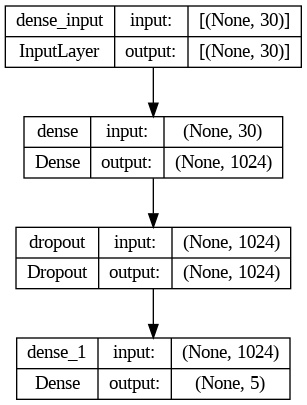

In [ ]:
tf.keras.utils.plot_model(shallow_model, to_file="shallow_model.png", show_shapes=True)

In [ ]:
history = shallow_model.fit(X_train, Y_train.values.ravel(), epochs=10, batch_size=32)

Epoch 1/10
10807/10807 [==============================] - 42s 4ms/step - loss: 0.0029 - accuracy: 0.9992
Epoch 2/10
10807/10807 [==============================] - 31s 3ms/step - loss: 0.0031 - accuracy: 0.9992
Epoch 3/10
10807/10807 [==============================] - 31s 3ms/step - loss: 0.0029 - accuracy: 0.9992
Epoch 4/10
10807/10807 [==============================] - 31s 3ms/step - loss: 0.0029 - accuracy: 0.9993
Epoch 5/10
10807/10807 [==============================] - 32s 3ms/step - loss: 0.0029 - accuracy: 0.9993
Epoch 6/10
10807/10807 [==============================] - 34s 3ms/step - loss: 0.0029 - accuracy: 0.9992
Epoch 7/10
10807/10807 [==============================] - 31s 3ms/step - loss: 0.0027 - accuracy: 0.9993
Epoch 8/10
10807/10807 [==============================] - 31s 3ms/step - loss: 0.0026 - accuracy: 0.9993
Epoch 9/10
10807/10807 [==============================] - 32s 3ms/step - loss: 0.0027 - accuracy: 0.9993
Epoch 10/10
10807/10807 [==============================

In [ ]:
deep_model = Sequential([
    Dense(1024, input_dim=30, activation='relu'),
    Dropout(0.01),
    Dense(768, activation='relu'),
    Dropout(0.01),
    Dense(512, activation='relu'),
    Dropout(0.01),
    Dense(256, activation='relu'),
    Dropout(0.01),
    Dense(128, activation='relu'),
    Dropout(0.01),
    Dense(5, activation='softmax')
])

In [ ]:
deep_model.compile(loss="sparse_categorical_crossentropy",
                   optimizer="adam",
                   metrics=["accuracy"])

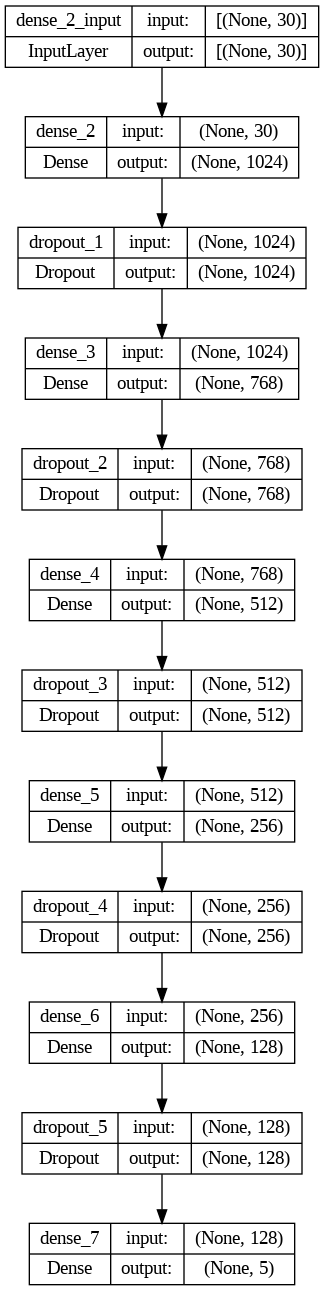

In [ ]:
tf.keras.utils.plot_model(deep_model, to_file="deep_model.png", show_shapes=True)

In [ ]:
#deep_model.fit(X_train, Y_train.values.ravel(), epochs=10, batch_size=32)

Prediction of the Neural Network

In [ ]:
predictions = shallow_model.predict(X_train)
predictions[26354]

10807/10807 [==============================] - 16s 2ms/step


array([4.7882837e-14, 9.9999994e-01, 3.9800168e-12, 1.5830667e-11,
       3.1691177e-16], dtype=float32)

In [ ]:
np.argmax(predictions[26354])

1

In [ ]:
#Testing the Neural Network
shallow_test = shallow_model.predict(X_test)
Shallow_preds_train = shallow_model.predict(X_train)


10344/10344 [==============================] - 15s 1ms/step


In [ ]:
print("Shallow Neural Network")
print("Training Accuracy: " , accuracy_score(Y_train, np.argmax(Shallow_preds_train, axis=1)))
print("Testng Accuracy: ", accuracy_score(Y_test, np.argmax(shallow_test, axis=1)))


Shallow Neural Network
Training Accuracy:  0.9992990809501079
Testng Accuracy:  0.9990799070092684
